In [154]:
!pip install geopy

## импортируем необходимые библиотеки

In [155]:
import pandas as pd
import numpy as np


In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [157]:
df = pd.read_csv("RESULT_C2.csv")
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,maximum temperature,minimum temperature,...,precipitation,snow depth,delta_time,time_day,hour,minute,distance,cluster_0,cluster_1,cluster_2
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,0,51,40,...,0.29,0.0,480.0,1,17,24,10606.707,0,0,1
1,1,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,51,40,...,0.29,0.0,1380.0,1,14,5,10618.264,0,0,1
2,1,1,-73.994484,40.745087,-73.998993,40.722710,695,0,51,40,...,0.29,0.0,720.0,1,15,4,10595.258,1,0,0
3,2,3,-73.944359,40.714489,-73.910530,40.709492,755,0,51,40,...,0.29,0.0,780.0,0,4,24,10673.053,1,0,0
4,2,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,51,40,...,0.29,0.0,1080.0,1,14,57,10651.433,0,0,1


In [158]:
from geopy.distance import geodesic

geodesic((40.767937, -73.982155), (40.765602, -73.964630)).km
# geopy.distance.vincenty((40.767937, -73.982155), (dropoff_latitude, dropoff_longitude)).km

1.5022029520818443

пересчитываю дистанцию (была посчитана неправильно)

In [159]:
def tmp(x):
    return geodesic((x.pickup_latitude, x.pickup_longitude), (x.dropoff_latitude, x.dropoff_longitude)).km

df.distance = df.apply(tmp, axis=1)

In [160]:
df[df.delta_time<0].index

Int64Index([   6127,    6138,    6273,    6348,    6355,    6469,    6624,
               6646,    6694,    6700,
            ...
            1034510, 1034678, 1034694, 1034735, 1034799, 1034856, 1035028,
            1035130, 1035215, 1035226],
           dtype='int64', length=675)

In [161]:
df = df.drop(index = df[df.delta_time<0].index)

In [162]:
df[df.delta_time<0]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,maximum temperature,minimum temperature,...,precipitation,snow depth,delta_time,time_day,hour,minute,distance,cluster_0,cluster_1,cluster_2


In [173]:
df.head(300)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,maximum temperature,minimum temperature,...,precipitation,snow depth,delta_time,time_day,hour,minute,distance,cluster_0,cluster_1,cluster_2
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,0,51,40,...,0.29,0.0,480.0,1,17,24,1.502172,0,0,1
1,1,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,51,40,...,0.29,0.0,1380.0,1,14,5,1.976279,0,0,1
2,1,1,-73.994484,40.745087,-73.998993,40.722710,695,0,51,40,...,0.29,0.0,720.0,1,15,4,2.513961,1,0,0
3,2,3,-73.944359,40.714489,-73.910530,40.709492,755,0,51,40,...,0.29,0.0,780.0,0,4,24,2.911908,1,0,0
4,2,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,51,40,...,0.29,0.0,1080.0,1,14,57,2.231986,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,-73.982788,40.730694,-73.990898,40.730732,181,0,51,40,...,0.29,0.0,180.0,1,14,40,0.685123,1,0,0
296,2,1,-73.960892,40.797031,-73.944397,40.834461,1087,0,51,40,...,0.29,0.0,1080.0,0,8,46,4.383372,0,0,1
297,1,1,-73.995201,40.739285,-73.988510,40.748051,265,0,51,40,...,0.29,0.0,240.0,1,15,17,1.125618,1,0,0
298,2,3,-73.953972,40.782955,-73.959518,40.774311,417,0,51,40,...,0.29,0.0,420.0,1,14,36,1.068028,0,0,1


## применим метод малых объемов данных для выбора подходящей архитектуры модели, а потом проведем отдельно гиперпараметризацию - для этого возьмем небольшой датасет для train и для test, потом на следующем этапе выделим датасет для валидации

In [170]:
df = df.reset_index().drop("index", axis=1)

In [175]:
tmp.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,maximum temperature,minimum temperature,...,precipitation,snow depth,delta_time,time_day,hour,minute,distance,cluster_0,cluster_1,cluster_2
1044547,2,2,-73.968643,40.760963,-73.973991,40.748653,339,0,43,26,...,0.00,0.0,300.0,0,20,53,1.439692,0,0,1
945666,2,2,-73.967468,40.752369,-73.985260,40.731918,851,0,44,25,...,0.00,0.0,900.0,0,9,1,2.723181,0,0,1
283958,1,1,-73.984329,40.758827,-73.986191,40.730587,1191,0,61,47,...,0.05,0.0,1200.0,1,18,58,3.139985,1,0,0
729319,1,1,-73.952614,40.766567,-73.977066,40.760841,1038,0,40,26,...,0.00,0.0,1020.0,0,10,23,2.160317,0,0,1
229227,2,1,-73.982849,40.765663,-73.988503,40.729752,1068,0,39,27,...,0.00,0.0,1020.0,0,22,51,4.016424,0,0,1


In [442]:
tmp=df.take(np.random.permutation(len(df))[:10000])
tmp = tmp.reset_index().drop("index", axis=1)
train_x = tmp.drop("trip_duration", axis=1).loc[:2000]
train_y = tmp["trip_duration"].loc[:2000]

test_x = tmp.drop("trip_duration",axis=1).loc[2000:10000]
test_y = tmp["trip_duration"].loc[2000:10000]

In [443]:
test_x

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,maximum temperature,minimum temperature,average temperature,precipitation,snow depth,delta_time,time_day,hour,minute,distance,cluster_0,cluster_1,cluster_2
2000,1,1,-73.969963,40.763161,-73.980125,40.755226,0,37,27,32.0,0.00,0.0,600.0,1,14,43,1.229939,0,0,1
2001,2,1,-73.975937,40.776360,-73.956947,40.744701,0,58,48,53.0,0.09,0.0,1860.0,1,12,56,3.864019,0,0,1
2002,2,1,-73.975288,40.755421,-73.972717,40.746780,0,30,22,26.0,0.00,0.0,660.0,1,14,21,0.983758,0,0,1
2003,1,1,-73.987595,40.719681,-73.997063,40.712925,0,83,66,74.5,0.40,0.0,420.0,0,0,59,1.096742,1,0,0
2004,1,2,-73.987846,40.759499,-73.946625,40.781612,0,55,38,46.5,0.00,0.0,1080.0,0,0,10,4.259377,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,1,-73.979584,40.752609,-73.905792,40.773048,0,41,28,34.5,0.00,0.0,1080.0,0,2,39,6.631210,1,0,0
9996,2,1,-73.969788,40.765869,-73.963470,40.768532,0,60,48,54.0,0.00,0.0,180.0,0,10,51,0.609838,0,0,1
9997,2,1,-74.001427,40.735889,-73.968140,40.767109,0,36,14,25.0,0.00,0.0,840.0,0,21,53,4.463370,1,0,0
9998,1,1,-73.982506,40.768406,-73.982269,40.785313,0,44,31,37.5,0.53,1.0,540.0,0,21,33,1.877593,0,0,1


In [178]:
import seaborn as sns

дополнительный анализ данных для оптимизации обучения

<AxesSubplot:xlabel='delta_time', ylabel='trip_duration'>

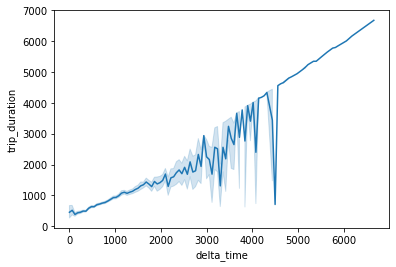

In [181]:
sns.lineplot(x=df.delta_time.loc[:10000], y=y[:10000])

In [182]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,maximum temperature,minimum temperature,...,precipitation,snow depth,delta_time,time_day,hour,minute,distance,cluster_0,cluster_1,cluster_2
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,0,51,40,...,0.29,0.0,480.0,1,17,24,1.502172,0,0,1
1,1,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,51,40,...,0.29,0.0,1380.0,1,14,5,1.976279,0,0,1
2,1,1,-73.994484,40.745087,-73.998993,40.722710,695,0,51,40,...,0.29,0.0,720.0,1,15,4,2.513961,1,0,0
3,2,3,-73.944359,40.714489,-73.910530,40.709492,755,0,51,40,...,0.29,0.0,780.0,0,4,24,2.911908,1,0,0
4,2,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,51,40,...,0.29,0.0,1080.0,1,14,57,2.231986,0,0,1


<AxesSubplot:xlabel='distance', ylabel='trip_duration'>

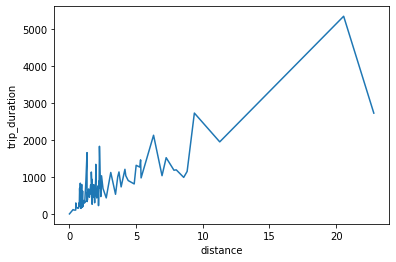

In [184]:
sns.lineplot(x=df.distance.loc[:100], y=y[:100])

# обучение базовых моделей

## LogisticRegression

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [186]:
reg = LogisticRegression()

In [194]:
reg.fit(train_x.loc[:500], train_y.loc[:500])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [195]:
reg.score(test_x, test_y)

0.0009995002498750624

In [211]:
train_x

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,maximum temperature,minimum temperature,average temperature,precipitation,snow depth,delta_time,time_day,hour,minute,distance,cluster_0,cluster_1,cluster_2
0,1,4,-73.964386,40.763969,-73.983047,40.750401,0,43,26,34.5,0.00,0.0,1200.0,1,17,8,2.180309,0,0,1
1,1,1,-73.980789,40.779846,-73.973434,40.760551,0,85,62,73.5,0.00,0.0,480.0,0,6,11,2.230829,0,0,1
2,1,1,-74.004219,40.742290,-73.982491,40.747566,0,68,47,57.5,0.00,0.0,480.0,1,18,32,1.926410,1,0,0
3,2,1,-73.917969,40.815971,-73.920593,40.808239,0,68,48,58.0,0.06,0.0,540.0,1,18,19,0.886777,0,0,1
4,1,1,-73.954742,40.799248,-73.968132,40.800392,0,55,44,49.5,0.03,0.0,300.0,1,11,5,1.137061,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2,1,-73.978256,40.766491,-74.001068,40.762779,0,55,43,49.0,0.00,0.0,960.0,0,10,7,1.969703,0,0,1
1997,1,2,-73.970993,40.788437,-73.968430,40.791683,0,55,29,42.0,0.14,0.0,780.0,1,15,40,0.420445,0,0,1
1998,2,5,-73.958504,40.800381,-73.990173,40.761902,0,87,67,77.0,0.00,0.0,960.0,1,16,14,5.040410,0,0,1
1999,1,1,-73.930382,40.761284,-73.940201,40.751110,0,82,68,75.0,1.65,0.0,120.0,0,21,23,1.401407,0,0,1


In [197]:
test_x.head().delta_time

2000     660.0
2001     540.0
2002     600.0
2003    1080.0
2004     780.0
Name: delta_time, dtype: float64

In [199]:
test_y.head()

2000     635
2001     547
2002     606
2003    1036
2004     755
Name: trip_duration, dtype: int64

In [202]:
x = df.loc[:10].drop("trip_duration", axis=1)
y = df.loc[:10].trip_duration

In [203]:
reg.predict(x)[:10]

array([855, 855, 855, 855, 855, 492, 855, 855, 855, 855], dtype=int64)

In [204]:
y[:10]

0     455
1    1346
2     695
3     755
4    1050
5     306
6     796
7     789
8    1954
9     795
Name: trip_duration, dtype: int64

In [205]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,maximum temperature,minimum temperature,...,precipitation,snow depth,delta_time,time_day,hour,minute,distance,cluster_0,cluster_1,cluster_2
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,0,51,40,...,0.29,0.0,480.0,1,17,24,1.502172,0,0,1
1,1,1,-73.975090,40.758766,-73.953201,40.765068,1346,0,51,40,...,0.29,0.0,1380.0,1,14,5,1.976279,0,0,1
2,1,1,-73.994484,40.745087,-73.998993,40.722710,695,0,51,40,...,0.29,0.0,720.0,1,15,4,2.513961,1,0,0
3,2,3,-73.944359,40.714489,-73.910530,40.709492,755,0,51,40,...,0.29,0.0,780.0,0,4,24,2.911908,1,0,0
4,2,1,-73.952881,40.766468,-73.978630,40.761921,1050,0,51,40,...,0.29,0.0,1080.0,1,14,57,2.231986,0,0,1


In [206]:
df.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'store_and_fwd_flag', 'maximum temperature', 'minimum temperature',
       'average temperature', 'precipitation', 'snow depth', 'delta_time',
       'time_day', 'hour', 'minute', 'distance', 'cluster_0', 'cluster_1',
       'cluster_2'],
      dtype='object')

In [207]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Матрица корелляции всех признаков'}>

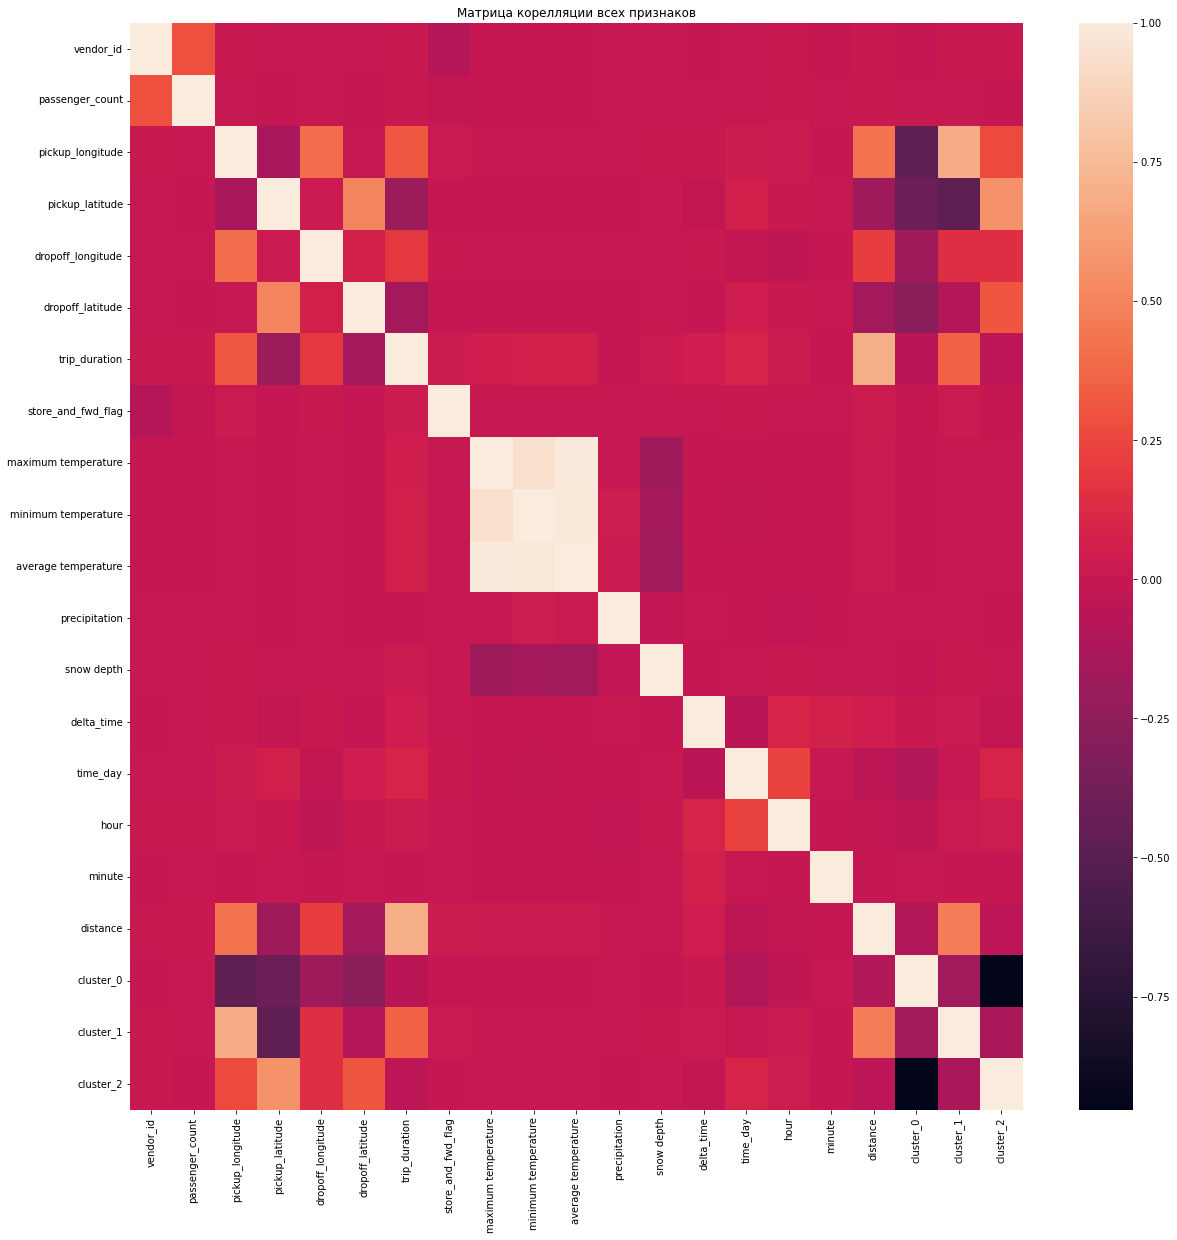

In [208]:
plt.figure(figsize=(20, 20))
plt.title("Матрица корелляции всех признаков")
matrix = df.corr()
sns.heatmap(matrix)

In [244]:
train_x.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'maximum temperature', 'minimum temperature', 'average temperature',
       'precipitation', 'snow depth', 'delta_time', 'time_day', 'hour',
       'minute', 'distance', 'cluster_0', 'cluster_1', 'cluster_2'],
      dtype='object')

In [246]:
x = pd.concat([train_x.delta_time, train_x.cluster_0, train_x.cluster_1, train_x.vendor_id, train_x["maximum temperature"], train_x["time_day"],  train_x.cluster_2], axis=1)
y = train_y

In [247]:
x.head()

,delta_time,cluster_0,cluster_1,vendor_id,maximum temperature,time_day,cluster_2
0,1200.0,0,0,1,43,1,1
1,480.0,0,0,1,85,0,1
2,480.0,1,0,1,68,1,0
3,540.0,0,0,2,68,1,1
4,300.0,0,0,1,55,1,1


In [248]:
y.head()

0    1199
1     495
2     491
3     544
4     265
Name: trip_duration, dtype: int64

In [249]:
reg = LogisticRegression()

In [250]:
x.shape

(2001, 7)

In [251]:
y.size

2001

In [252]:
reg.fit(x.loc[:2000], y.loc[:2000])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

## введем свою метрику - среднее значение отклонения времени, такая метрик будет лучше давать понимание о качестве модели в задаче регрессии

In [344]:
def reg_score(x1, x2):
    x1 = x1.tolist()
    x2 = x2.tolist()
    res = []
    
    for i in range(len(x1)):
        res.append(abs(x1[i] - x2[i]))
        
    res.sort()
    return sum(res[500:-500]) / (len(x1) - 200)

In [345]:

reg_score(y.loc[:3000], reg.predict(x.loc[:3000]))

203.0284418734654

In [346]:
reg.predict(x.loc[:20])

array([816.07953033, 789.18224576, 885.42024911, 912.83439657,
       847.98319312, 866.74100398, 856.0727718 , 663.29309022,
       698.53302207, 684.72495927, 926.1486381 , 776.24395278,
       880.30782991, 762.44151905, 898.8355244 , 857.34118523,
       867.25166421, 658.02912037, 909.53743451, 885.9196512 ,
       698.24126832])

In [347]:
y.loc[:20]

0     1199
1      495
2      491
3      544
4      265
5      300
6      436
7     1150
8      947
9      668
10     196
11     910
12     855
13    1135
14     539
15    3797
16     914
17    1060
18     492
19     138
20    1073
Name: trip_duration, dtype: int64

## SVR

In [348]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

In [349]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(x.loc[:1000], y.loc[:1000])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [350]:
y.loc[:20]

0     1199
1      495
2      491
3      544
4      265
5      300
6      436
7     1150
8      947
9      668
10     196
11     910
12     855
13    1135
14     539
15    3797
16     914
17    1060
18     492
19     138
20    1073
Name: trip_duration, dtype: int64

## SGDRegressor - показывает значительно лучший результат, среднее отклонение 22 секунды

In [423]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [430]:
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=10000, tol=1e-3))

In [431]:
reg.fit(x.loc[:3000], y.loc[:3000])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=10000))])

In [432]:
x.head()

,delta_time,cluster_0,cluster_1,vendor_id,maximum temperature,time_day,cluster_2
0,1200.0,0,0,1,43,1,1
1,480.0,0,0,1,85,0,1
2,480.0,1,0,1,68,1,0
3,540.0,0,0,2,68,1,1
4,300.0,0,0,1,55,1,1


In [433]:
y.head()

0    1199
1     495
2     491
3     544
4     265
Name: trip_duration, dtype: int64

In [434]:
reg_score(y.loc[:1200], reg.predict(x.loc[:1200]))

73.7305580708146

In [435]:
cross_val_score(reg, x, y, cv=10)

array([ 0.00048657,  0.25118112,  0.10452243,  0.16668209,  0.08656989,
        0.10687981,  0.20307205,  0.00231549,  0.0087108 , -0.03307198])

### посмотрим на предсказания

In [391]:
reg.predict(x.iloc[:20])

array([791.64188921, 769.44246205, 888.15955516, 904.26819245,
       821.22929081, 838.62805837, 828.7337169 , 684.88239189,
       740.45287597, 672.55428276, 916.61619787, 812.53348444,
       851.21512087, 776.84730615, 900.60318341, 885.01741304,
       894.19458329, 647.79452336, 910.52939917, 879.30125025])

In [392]:
y.loc[:20]

0     1199
1      495
2      491
3      544
4      265
5      300
6      436
7     1150
8      947
9      668
10     196
11     910
12     855
13    1135
14     539
15    3797
16     914
17    1060
18     492
19     138
20    1073
Name: trip_duration, dtype: int64

## попробуем обучить на датасете без большинства сгенерированных фич 

In [393]:
new_x = train_x.drop(["delta_time", "cluster_0", "cluster_1", "cluster_2", "distance"], axis=1)
new_y = train_y

In [394]:
new_x.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,maximum temperature,minimum temperature,average temperature,precipitation,snow depth,time_day,hour,minute
0,1,4,-73.964386,40.763969,-73.983047,40.750401,0,43,26,34.5,0.00,0.0,1,17,8
1,1,1,-73.980789,40.779846,-73.973434,40.760551,0,85,62,73.5,0.00,0.0,0,6,11
2,1,1,-74.004219,40.742290,-73.982491,40.747566,0,68,47,57.5,0.00,0.0,1,18,32
3,2,1,-73.917969,40.815971,-73.920593,40.808239,0,68,48,58.0,0.06,0.0,1,18,19
4,1,1,-73.954742,40.799248,-73.968132,40.800392,0,55,44,49.5,0.03,0.0,1,11,5


In [395]:
new_y.head()

0    1199
1     495
2     491
3     544
4     265
Name: trip_duration, dtype: int64

In [396]:
reg.fit(new_x.loc[:2000], new_y.loc[:2000])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=10000, tol=0.01))])

In [400]:
reg_score(reg.predict(new_x.iloc[:1000]), new_y.iloc[:1000])

0.0

In [398]:
new_x.iloc[:, 2000:3000]

""
0
1
2
3
4
...
1996
1997
1998
1999


In [412]:
cross_val_score(reg, new_x, new_y, cv=10)

array([-9.73831087e-05,  3.30588780e-01,  2.75242188e-01,  2.19069067e-01,
        1.89976285e-01,  1.21818779e-01,  1.93740047e-01,  2.00780334e-01,
        1.61143966e-01,  1.12519526e-02])

## без сгенерированных фич точность очень низкая

## DecisionTreeRegressor

In [413]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [414]:
regressor = DecisionTreeRegressor(random_state=0)

In [415]:
cross_val_score(regressor, x, y, cv=10)

array([0.99627846, 0.99107044, 0.9966012 , 0.99738939, 0.99617743,
       0.99669593, 0.99725327, 0.99498595, 0.99638802, 0.93918895])

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(x, y)

In [437]:
cross_val_score(regr, x, y, cv=10)

array([-0.09818918, -0.06042554, -0.05039526, -0.03596143, -0.06214716,
       -0.04954339, -0.05347568, -0.07771117, -0.05776315, -0.05298383])

## Random Forest

In [438]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [439]:
reg = RandomForestRegressor(max_depth=5, random_state=0)

In [440]:
cross_val_score(reg, x, y, cv=10)

array([0.99766447, 0.99063456, 0.99789998, 0.99382483, 0.99730441,
       0.99788059, 0.9984774 , 0.98231496, 0.99739123, 0.94662634])

## по итогу проведенного анализа RandomForestRegressor показал лучшую точность по сравнению с другими алгоритмами

## протестриуем ее на большем наборе данных

In [444]:
cross_val_score(regressor, test_x, test_y, cv=10)

array([0.99419304, 0.99594867, 0.99267481, 0.98932729, 0.99399529,
       0.990006  , 0.9968496 , 0.99487537, 0.99086394, 0.93552367])

оптимизация гиперпараметров

In [455]:
tmp=df.take(np.random.permutation(len(df))[:10000])
tmp = tmp.reset_index().drop("index", axis=1)
train_x = tmp.drop("trip_duration", axis=1).loc[:10000]
train_y = tmp["trip_duration"].loc[:10000]



In [456]:
from sklearn.model_selection import RandomizedSearchCV
reg = RandomForestRegressor(random_state=0)
params = {
    "max_depth":range(1, 10, 3),
    "n_estimators":range(50, 300, 100), 
    "criterion":["squared_error", "poisson"],
}
clf = RandomizedSearchCV(reg, params)

In [457]:
search = clf.fit(train_x, train_y)

In [459]:
search.best_params_

{'n_estimators': 250, 'max_depth': 7, 'criterion': 'squared_error'}

In [461]:
best_model = search.best_estimator_

In [462]:
import pickle

In [464]:
with open("best_model22.pickle", "wb") as f:
    pickle.dump(best_model, f)

In [470]:
from sklearn.model_selection import validation_curve
train_scores, valid_scores = validation_curve(best_model, x, y, "alpha", np.logspace(-7, 3, 3), cv=5)

TypeError: validation_curve() takes 3 positional arguments but 5 positional arguments (and 1 keyword-only argument) were given

In [481]:
train_scores, valid_scores = validation_curve(
...     RandomForestRegressor(), x, y, param_name="max_depth", param_range=np.logspace(1, 7, 3),
...     cv=5)

In [482]:
import matplotlib.pyplot as plt


Validate curve

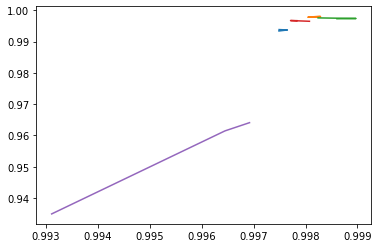

In [484]:
plt.plot(train_scores, valid_scores)

In [486]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(
     RandomForestRegressor(), x, y, train_sizes=[50, 80, 110], cv=5)

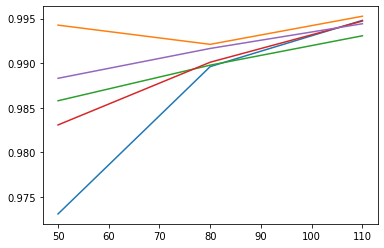

In [487]:
plt.plot(train_sizes, train_scores)

## отчет

в ходе выполненной работы была использована кросс валидация, разбиьа выборка, оптимизирвованы все параметры модели, подобрана и сохранена лучшая модель, построенкривые валидации и обучения
проанализировано больше 6 рмоделей с различнвми архитектурами
выявлена польза сгенерированных фич
выполнена точная оценка работы алгоритма
азработана дополнительная метрика оценки работы алгоритма

для оптимизации был использован рандомизированный поиск лучших параметров